In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install --quiet torchviz
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
import time
from sklearn.model_selection import train_test_split


In [3]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# First We Load The Images

In [5]:
import zipfile
import os

Train_Images = zipfile.ZipFile('/content/gdrive/MyDrive/Colab Notebooks/COS/Assignment 3/Actual_Work/Train_Images.zip', 'r') #Opens the zip file in read mode
Train_Images.extractall('/tmp') #Extracts the files into the /tmp folder
Train_Images.close()

In [6]:
len(os.listdir('/tmp/Train_Images/Train_Images'))

3002

ID_WA6GJS0Z.jpg


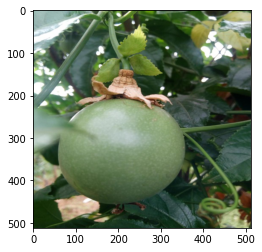

In [10]:
n = 55
name = os.listdir('/tmp/Train_Images/Train_Images')[n]
print(name)

img=plt.imread("/tmp/Train_Images/Train_Images/{}".format(name))
imgplot = plt.imshow(img)

# Now We Load the Training Set

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [12]:
df = pd.read_csv("Train.csv")
df.head

<bound method NDFrame.head of          Image_ID            class   xmin   ymin  width  height
0     ID_007FAIEI  fruit_woodiness   87.0   87.5  228.0   311.0
1     ID_00G8K1V3  fruit_brownspot   97.5   17.5  245.0   354.5
2     ID_00WROUT9  fruit_brownspot  156.5  209.5  248.0   302.5
3     ID_00ZJEEK3    fruit_healthy  125.0  193.0  254.5   217.0
4     ID_018UIENR  fruit_brownspot   79.5  232.5  233.5   182.0
...           ...              ...    ...    ...    ...     ...
3901  ID_ZZAB1FH1    fruit_healthy   96.0  175.5  289.5   222.0
3902  ID_ZZAB1FH1    fruit_healthy  330.0  241.0  182.0   180.5
3903  ID_ZZJZ2CV6    fruit_healthy  358.0  234.0  134.5   107.0
3904  ID_ZZJZ2CV6    fruit_healthy   98.5  135.0  275.5   213.5
3905  ID_ZZO9KIH9  fruit_woodiness  123.5  218.5  197.5   153.5

[3906 rows x 6 columns]>

In [14]:
df

,Image_ID,class,xmin,ymin,width,height
0,ID_007FAIEI,fruit_woodiness,87.0,87.5,228.0,311.0
1,ID_00G8K1V3,fruit_brownspot,97.5,17.5,245.0,354.5
2,ID_00WROUT9,fruit_brownspot,156.5,209.5,248.0,302.5
3,ID_00ZJEEK3,fruit_healthy,125.0,193.0,254.5,217.0
4,ID_018UIENR,fruit_brownspot,79.5,232.5,233.5,182.0
...,...,...,...,...,...,...
3901,ID_ZZAB1FH1,fruit_healthy,96.0,175.5,289.5,222.0
3902,ID_ZZAB1FH1,fruit_healthy,330.0,241.0,182.0,180.5
3903,ID_ZZJZ2CV6,fruit_healthy,358.0,234.0,134.5,107.0
3904,ID_ZZJZ2CV6,fruit_healthy,98.5,135.0,275.5,213.5


Text(0.5, 1.0, 'fruit_healthy')

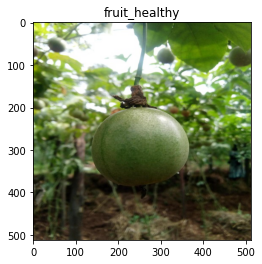

In [17]:
n = 345
id = df.iloc[n]["Image_ID"]
Class = df.iloc[n]["class"]
img=plt.imread("/tmp/Train_Images/Train_Images/{}.jpg".format(id))
imgplot = plt.imshow(img)
plt.title(Class)

In [64]:
id

'ID_0JOUSB83'

In [18]:
df_test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/COS/Assignment 3/Actual_Work/Test.csv")
df_test.head

<bound method NDFrame.head of         Image_ID
0    ID_IUJJG62B
1    ID_ZPNDRD4T
2    ID_AHFYB64P
3    ID_L8JZLNTF
4    ID_IFMUXGPL
..           ...
926  ID_77MDJGMZ
927  ID_PG3E6NQT
928  ID_038S0ONN
929  ID_D5YBIDDT
930  ID_2XGXT7SJ

[931 rows x 1 columns]>